# Experimental Setup Evaluation - Results Visualization

This notebook visualizes results from the full pipeline run.

**Features**:
- Load results from any run directory
- Show redacted text and generated setups
- Visualize quality scores and alignment scores
- Compare non-agentic vs agentic vs ground truth

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display, HTML, Markdown

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure display
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

## 1. Load Results

Specify your run directory below:

In [2]:
# CONFIGURE THIS: Path to your run directory
RUN_DIR = Path("../../runs/20251117_222251_full_eval")

# Load summary
summary_path = RUN_DIR / "summary.json"
with open(summary_path) as f:
    summary = json.load(f)

print(f"Run: {RUN_DIR.name}")
print(f"Total papers: {summary['total_papers']}")
print(f"Successful: {summary['successful']}")
print(f"\nPapers processed:")
for i, result in enumerate(summary['results'], 1):
    paper_id = result['paper_id']
    winner = result.get('alignment', {}).get('winner', 'n/a')
    print(f"  {i}. {paper_id[:60]} (winner: {winner})")

Run: 20251117_222251_full_eval
Total papers: 2
Successful: 2

Papers processed:
  1. Understanding Scaling Laws with Statistical and Ap_e411a237 (winner: tie)
  2. Scaling transformer neural networks for skillful a_f9bbc835 (winner: tie)


## 2. Select Paper to Visualize

In [3]:
# CONFIGURE THIS: Select paper index (0-based)
PAPER_INDEX = 0

paper_result = summary['results'][PAPER_INDEX]
paper_id = paper_result['paper_id']
paper_dir = RUN_DIR / paper_id

print(f"Selected paper: {paper_id}")
print(f"Directory: {paper_dir}")

# Load all JSON files for this paper
def load_json(filename):
    path = paper_dir / filename
    if path.exists():
        with open(path) as f:
            return json.load(f)
    return None

paper_context = load_json("paper_context.json")
ground_truth = load_json("ground_truth.json")
non_agentic_setup = load_json("non_agentic_setup.json")
agentic_setup = load_json("agentic_setup.json")
non_agentic_alignment = load_json("non_agentic_alignment.json")
agentic_alignment = load_json("agentic_alignment.json")
setup_comparison = load_json("setup_comparison.json")

print("\nLoaded files:")
for name in ['paper_context', 'ground_truth', 'non_agentic_setup', 'agentic_setup', 
             'non_agentic_alignment', 'agentic_alignment', 'setup_comparison']:
    data = locals()[name]
    print(f"  {name}: {'✓' if data else '✗'}")

Selected paper: Understanding Scaling Laws with Statistical and Ap_e411a237
Directory: ../../runs/20251117_222251_full_eval/Understanding Scaling Laws with Statistical and Ap_e411a237

Loaded files:
  paper_context: ✓
  ground_truth: ✓
  non_agentic_setup: ✓
  agentic_setup: ✓
  non_agentic_alignment: ✓
  agentic_alignment: ✓
  setup_comparison: ✓


## 3. Paper Context & Redacted Text

This is what the AI saw (without experimental sections):

In [4]:
if paper_context:
    display(Markdown(f"""
### Paper Title
{paper_context.get('title', 'N/A')}

### Abstract
{paper_context.get('abstract', 'N/A')}

### Research Question
{paper_context.get('research_question', 'N/A')}

### Domain
{paper_context.get('domain', 'N/A')}

### Method Description
{paper_context.get('method_description', 'N/A')}
"""))
else:
    print("No paper context found")


### Paper Title
Unknown Title

### Abstract


When training deep neural networks, a model’s generalization error is often observed to follow a power scaling law dependent both on the model size and the
data size. Perhaps the best known example of such scaling laws are for transformerbased large language models ( **LLMs** ), where networks with billions of parameters
are trained on trillions of tokens of text. Yet, despite sustained widespread interest,
a rigorous understanding of why transformer scaling laws exist is still missing. To
answer this question, we establish novel statistical estimation and mathematical
approximation theories for transformers when the input data are concentrated on a
low-dimensional manifold. Our theory predicts a power law between the generalization error and both the training data size and the network size for transformers,
where the power depends on the intrinsic dimension _d_ of the training data. Notably,
the constructed model architecture is shallow, requiring only logarithmic depth in _d_ .
By 

### Research Question
Why do transformer scaling laws exist, and how can a theoretical framework based on statistical estimation and mathematical approximation explain the power law relationship between generalization error, training data size, and network size, particularly in relation to the intrinsic dimension of the data?

### Domain
ML-THEORY

### Method Description
**Approximation Theory**


**B.1** **Squared Regression Error**



First we extract bounds on scaling laws in the case of regression squared error. We have the bound
from the proof of Theorem 1


2 ˜ _β_
� _f_ ( _x_ ) _−_ T [ˆ] _n_ ( _x_ )� _dQ_ ( _x_ ) _≤_ _O_ � _ϵ_ [2] + _[Dd]_ [2] _[ϵ]_ _[−]_ _[d]_ �

� _M_ _n_



2 ˜ _β_
� _f_ ( _x_ ) _−_ T [ˆ] _n_ ( _x_ )� _dQ_ ( _x_ ) _≤_ _O_ � _ϵ_ [2] + _[Dd]_ [2] _[ϵ]_ _[−]_ _[d]_



_β_



_M_



�
_n_



where _ϵ_ is the approximation error such that


inf
T _∈_ T _[∥][f][ −]_ [T] _[∥]_ _[L]_ _[∞]_ [(] _[M]_ [)] _[ < ϵ]_



Let the _model size_ _N_ of a transformer T _∈T_ be _N_ = _L_ _T_ ( _d_ [2] _embd_ [(3] _[m]_ [ +] _[ L]_ [FFN] [)) = log(] _[d]_ [)(25(3] _[ϵ]_ _[−]_ _β_ _[d]_



Let the _model size_ _N_ of a transformer T _∈T_ be _N_ = _L_ _T_ ( _d_ _embd_ [(3] _[m]_ [ +] _[ L]_ [FFN] [)) = log(] _[d]_ [)(25(3] _[ϵ]_ _β_ +

log( _ϵ_ _[−]_ [1] ))) = _O_ [˜] � _ϵ_ _[−]_ _β_ _[d]_ [�] . Write the squared generalization error as



_β_ [�] . Write the squared generalization error as



_L_ sq ( _N, n_ ) =
� _M_



2
� _f_ ( _x_ ) _−_ T [ˆ] _n_ ( _x_ )� _dQ_ ( _x_ ) _._



Then



_β_

_L_ sq ( _N, n_ ) _≤_ _O_ [˜] � _ϵ_ [2] + _[Dd]_ [2] _[ϵ]_ _[−]_ _[d]_



_β_




_[β]_

_d_ + _[N]_




_[ϵ]_

� = _O_ [˜] � _N_ _[−]_ [2] _d_ _[β]_
_n_



�
_n_




_[N]_ _n_ _[<< N]_ _[ −]_ [2] _d_ _[β]_



In the model scaling regime, when data is plentiful, we have _[N]_



In the model scaling regime, when data is plentiful, we have _n_ _[<< N]


## 4. Quality Scores Comparison

Pre-ground-truth quality scores (0-1):

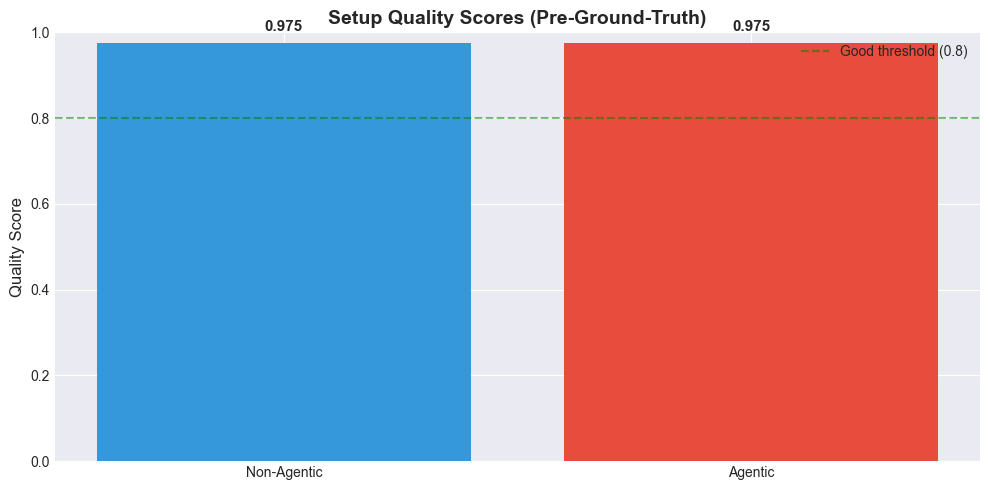


Quality winner: Agentic


In [5]:
# Extract quality scores
quality_data = {
    'Non-Agentic': paper_result['quality']['non_agentic'],
    'Agentic': paper_result['quality']['agentic']
}

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(quality_data.keys(), quality_data.values(), color=['#3498db', '#e74c3c'])
ax.set_ylabel('Quality Score', fontsize=12)
ax.set_title('Setup Quality Scores (Pre-Ground-Truth)', fontsize=14, fontweight='bold')
ax.set_ylim(0, 1.0)
ax.axhline(y=0.8, color='green', linestyle='--', alpha=0.5, label='Good threshold (0.8)')
ax.legend()

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.3f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nQuality winner: {'Non-Agentic' if quality_data['Non-Agentic'] > quality_data['Agentic'] else 'Agentic'}")

## 5. Alignment Scores (vs Ground Truth)

How well each approach matched human choices:

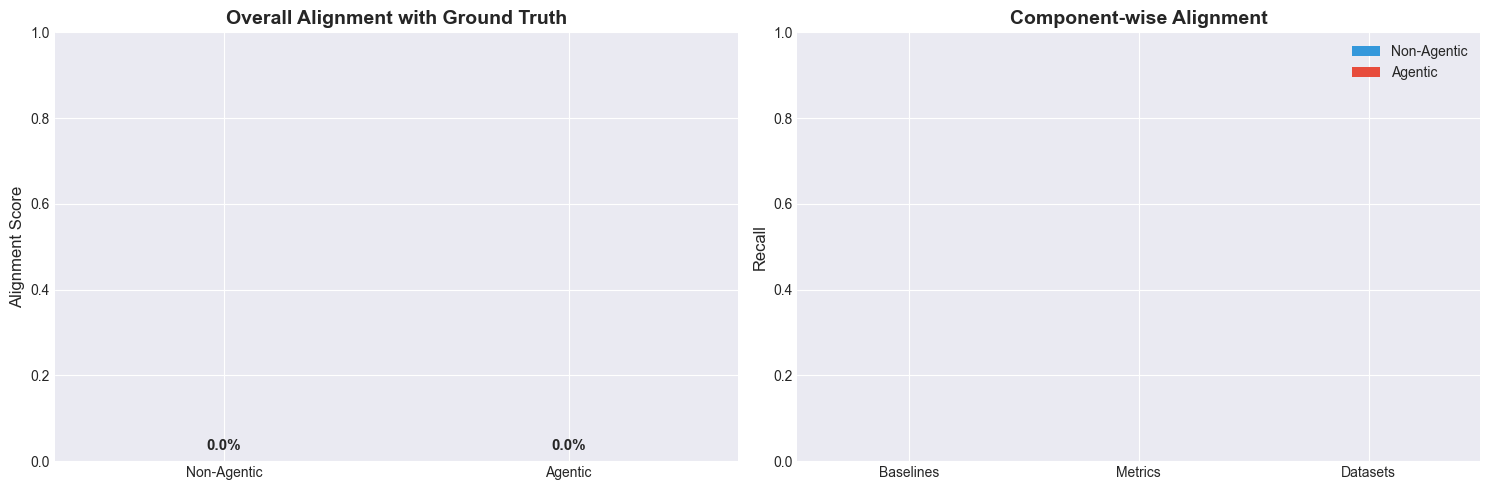


Alignment winner: TIE


In [6]:
if non_agentic_alignment and agentic_alignment:
    # Extract alignment scores
    alignment_data = {
        'Non-Agentic': {
            'Overall': non_agentic_alignment['overall_alignment'],
            'Baselines': non_agentic_alignment['baseline_alignment']['recall'],
            'Metrics': non_agentic_alignment['metric_alignment']['recall'],
            'Datasets': non_agentic_alignment['dataset_alignment']['recall']
        },
        'Agentic': {
            'Overall': agentic_alignment['overall_alignment'],
            'Baselines': agentic_alignment['baseline_alignment']['recall'],
            'Metrics': agentic_alignment['metric_alignment']['recall'],
            'Datasets': agentic_alignment['dataset_alignment']['recall']
        }
    }
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Overall alignment
    overall_scores = [alignment_data['Non-Agentic']['Overall'], alignment_data['Agentic']['Overall']]
    bars = ax1.bar(['Non-Agentic', 'Agentic'], overall_scores, color=['#3498db', '#e74c3c'])
    ax1.set_ylabel('Alignment Score', fontsize=12)
    ax1.set_title('Overall Alignment with Ground Truth', fontsize=14, fontweight='bold')
    ax1.set_ylim(0, 1.0)
    
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.1%}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Component breakdown
    components = ['Baselines', 'Metrics', 'Datasets']
    x = range(len(components))
    width = 0.35
    
    non_agentic_scores = [alignment_data['Non-Agentic'][c] for c in components]
    agentic_scores = [alignment_data['Agentic'][c] for c in components]
    
    ax2.bar([i - width/2 for i in x], non_agentic_scores, width, label='Non-Agentic', color='#3498db')
    ax2.bar([i + width/2 for i in x], agentic_scores, width, label='Agentic', color='#e74c3c')
    
    ax2.set_ylabel('Recall', fontsize=12)
    ax2.set_title('Component-wise Alignment', fontsize=14, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(components)
    ax2.set_ylim(0, 1.0)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    winner = paper_result['alignment']['winner']
    print(f"\nAlignment winner: {winner.upper()}")
else:
    print("No alignment data available (ground truth may be empty)")

## 6. Generated Setups: Non-Agentic

What the non-agentic approach generated:

In [7]:
if non_agentic_setup:
    setup = non_agentic_setup['setup']
    if 'ai_setup' in setup:
        setup = setup['ai_setup']
    
    print("="*70)
    print("NON-AGENTIC GENERATED SETUP")
    print("="*70)
    
    print("\nBASELINES:")
    for i, baseline in enumerate(setup.get('baselines', []), 1):
        if isinstance(baseline, dict):
            print(f"  {i}. {baseline.get('name', 'N/A')}")
            print(f"     {baseline.get('description', 'N/A')}")
        else:
            print(f"  {i}. {baseline}")
    
    print("\nMETRICS:")
    for i, metric in enumerate(setup.get('metrics', []), 1):
        if isinstance(metric, dict):
            print(f"  {i}. {metric.get('name', 'N/A')}")
            print(f"     {metric.get('description', 'N/A')}")
        else:
            print(f"  {i}. {metric}")
    
    print("\nDATASETS:")
    for i, dataset in enumerate(setup.get('datasets', []), 1):
        if isinstance(dataset, dict):
            print(f"  {i}. {dataset.get('name', 'N/A')}")
            print(f"     {dataset.get('description', 'N/A')}")
        else:
            print(f"  {i}. {dataset}")
    
    print("\nMETADATA:")
    metadata = non_agentic_setup.get('metadata', {})
    print(f"  Time: {metadata.get('time_elapsed', 'N/A'):.2f}s")
    print(f"  LLM calls: {metadata.get('llm_calls', 'N/A')}")
    print(f"  Quality score: {metadata.get('quality_score', 'N/A'):.3f}")
else:
    print("No non-agentic setup found")

NON-AGENTIC GENERATED SETUP

BASELINES:
  1. Random Initialization Transformer
     A transformer model initialized randomly with no pretraining.
  2. Pretrained Large Transformer
     A pretrained transformer model (e.g., GPT-3) with billions of parameters.
  3. Low-Dimensional Embedded Transformer
     A transformer trained on a dataset artificially constrained to a lower-dimensional manifold.
  4. Shallow Transformer
     A shallow transformer architecture with logarithmic depth.

METRICS:
  1. Mean Squared Error (MSE)
     Measures the average squared difference between predicted and actual values.
  2. R-squared (R²)
     Indicates the proportion of variance explained by the model.
  3. Model Size Efficiency
     Evaluates the generalization error as a function of model size.
  4. Data Size Efficiency
     Evaluates the generalization error as a function of training data size.

DATASETS:
  1. Synthetic Low-Dimensional Data
     A synthetically generated dataset constrained to a lo

## 7. Generated Setups: Agentic

What the agentic approach generated (with exploration):

In [8]:
if agentic_setup:
    setup = agentic_setup['setup']
    if 'ai_setup' in setup:
        setup = setup['ai_setup']
    
    print("="*70)
    print("AGENTIC GENERATED SETUP")
    print("="*70)
    
    print("\nBASELINES:")
    for i, baseline in enumerate(setup.get('baselines', []), 1):
        if isinstance(baseline, dict):
            print(f"  {i}. {baseline.get('name', 'N/A')}")
            print(f"     {baseline.get('description', 'N/A')}")
        else:
            print(f"  {i}. {baseline}")
    
    print("\nMETRICS:")
    for i, metric in enumerate(setup.get('metrics', []), 1):
        if isinstance(metric, dict):
            print(f"  {i}. {metric.get('name', 'N/A')}")
            print(f"     {metric.get('description', 'N/A')}")
        else:
            print(f"  {i}. {metric}")
    
    print("\nDATASETS:")
    for i, dataset in enumerate(setup.get('datasets', []), 1):
        if isinstance(dataset, dict):
            print(f"  {i}. {dataset.get('name', 'N/A')}")
            print(f"     {dataset.get('description', 'N/A')}")
        else:
            print(f"  {i}. {dataset}")
    
    print("\nMETADATA:")
    metadata = agentic_setup.get('metadata', {})
    print(f"  Time: {metadata.get('time_elapsed', 'N/A'):.2f}s")
    print(f"  LLM calls: {metadata.get('llm_calls', 'N/A')}")
    print(f"  Best score: {metadata.get('best_score', 'N/A'):.3f}")
    print(f"  Drafts explored: {metadata.get('drafts_explored', 'N/A')}")
    
    # Show exploration tree if available
    if 'exploration_tree' in agentic_setup:
        print("\nEXPLORATION TREE:")
        for draft in agentic_setup['exploration_tree']:
            draft_id = draft['draft_id']
            score = draft['score']
            is_best = draft.get('is_best', False)
            marker = "⭐ SELECTED" if is_best else ""
            print(f"  Draft {draft_id}: {score:.3f} {marker}")
else:
    print("No agentic setup found")

AGENTIC GENERATED SETUP

BASELINES:
  1. Standard Transformer Scaling
     Evaluate transformer-based models following established scaling laws.
  2. Shallow Transformer with Fixed Intrinsic Dimension
     Implement a shallow transformer with logarithmic depth in the intrinsic dimension as proposed in the paper.
  3. Random Baseline Model
     Train a random neural network of comparable size without any scaling laws assumptions.
  4. Empirical Scaling Laws from LLMs
     Use empirical scaling laws derived from training large LLMs.

METRICS:
  1. Squared Regression Error (L_sq)
     Measures the squared difference between predicted and actual values.
  2. Power Law Fit Accuracy
     Measures the goodness-of-fit for the predicted power law relation between error, model size, and data size.
  3. Training Efficiency
     Measures the computational efficiency of training models under different configurations.
  4. Model Complexity Measure
     Quantifies the intrinsic dimensionality of the 

## 8. Ground Truth (What Authors Actually Did)

Extracted from the paper's experimental sections:

In [9]:
if ground_truth and ground_truth.get('has_experiments'):
    print("="*70)
    print("GROUND TRUTH (ACTUAL PAPER)")
    print("="*70)
    
    print("\nBASELINES:")
    for i, baseline in enumerate(ground_truth.get('baselines', []), 1):
        if isinstance(baseline, dict):
            print(f"  {i}. {baseline.get('name', 'N/A')}")
            print(f"     {baseline.get('description', 'N/A')}")
        else:
            print(f"  {i}. {baseline}")
    
    print("\nMETRICS:")
    for i, metric in enumerate(ground_truth.get('metrics', []), 1):
        if isinstance(metric, dict):
            print(f"  {i}. {metric.get('name', 'N/A')}")
            print(f"     {metric.get('description', 'N/A')}")
        else:
            print(f"  {i}. {metric}")
    
    print("\nDATASETS:")
    for i, dataset in enumerate(ground_truth.get('datasets', []), 1):
        if isinstance(dataset, dict):
            print(f"  {i}. {dataset.get('name', 'N/A')}")
            print(f"     {dataset.get('description', 'N/A')}")
        else:
            print(f"  {i}. {dataset}")
    
    print(f"\nExtraction confidence: {ground_truth.get('extraction_confidence', 'N/A').upper()}")
else:
    print("No ground truth available (paper may lack clear experimental sections)")

GROUND TRUTH (ACTUAL PAPER)

BASELINES:

METRICS:
  1. Scaling Exponent (α_D)
     Measures the predicted scaling law exponent for data size.
  2. Scaling Exponent (α_N)
     Measures the predicted scaling law exponent for model size.

DATASETS:
  1. Gokaslan et al. dataset
     Natural language dataset used for pretraining small LLMs.
  2. Eldan and Li dataset
     Natural language dataset used for pretraining small LLMs.
  3. Kocetkov et al. dataset
     Natural language dataset used for pretraining small LLMs.

Extraction confidence: MEDIUM


## 9. Detailed Alignment Analysis

In [10]:
if non_agentic_alignment and agentic_alignment:
    print("="*70)
    print("DETAILED ALIGNMENT ANALYSIS")
    print("="*70)
    
    for approach, alignment in [('Non-Agentic', non_agentic_alignment), ('Agentic', agentic_alignment)]:
        print(f"\n{'─'*70}")
        print(f"{approach.upper()}")
        print(f"{'─'*70}")
        
        print(f"\nOverall Alignment: {alignment['overall_alignment']:.1%}")
        
        for component in ['baseline', 'metric', 'dataset']:
            comp_align = alignment[f'{component}_alignment']
            print(f"\n{component.upper()}S:")
            print(f"  Recall: {comp_align['recall']:.1%} ({comp_align['found_count']}/{comp_align['total_count']})")
            if comp_align['found']:
                print(f"  Found: {', '.join(comp_align['found'])}")
            if comp_align['missing']:
                print(f"  Missing: {', '.join(comp_align['missing'])}")
            if comp_align['extra']:
                print(f"  Extra: {', '.join(comp_align['extra'][:5])}")
else:
    print("No alignment data available")

DETAILED ALIGNMENT ANALYSIS

──────────────────────────────────────────────────────────────────────
NON-AGENTIC
──────────────────────────────────────────────────────────────────────

Overall Alignment: 0.0%

BASELINES:
  Recall: 0.0% (0/0)

METRICS:
  Recall: 0.0% (0/2)
  Missing: scaling exponent (α_d), scaling exponent (α_n)
  Extra: data size efficiency, mean squared error (mse), model size efficiency, r-squared (r²)

DATASETS:
  Recall: 0.0% (0/3)
  Missing: eldan and li dataset, gokaslan et al. dataset, kocetkov et al. dataset
  Extra: cifar-10, imagenet, synthetic low-dimensional data, wikitext-103

──────────────────────────────────────────────────────────────────────
AGENTIC
──────────────────────────────────────────────────────────────────────

Overall Alignment: 0.0%

BASELINES:
  Recall: 0.0% (0/0)

METRICS:
  Recall: 0.0% (0/2)
  Missing: scaling exponent (α_d), scaling exponent (α_n)
  Extra: model complexity measure, power law fit accuracy, squared regression error (l_sq

## 10. Cost Analysis

COST ANALYSIS

Non-Agentic:
  Time: 13.92s
  LLM calls: 1

Agentic:
  Time: 49.27s
  LLM calls: 3

Cost Multiplier:
  Time: 3.5x
  LLM calls: 3.0x


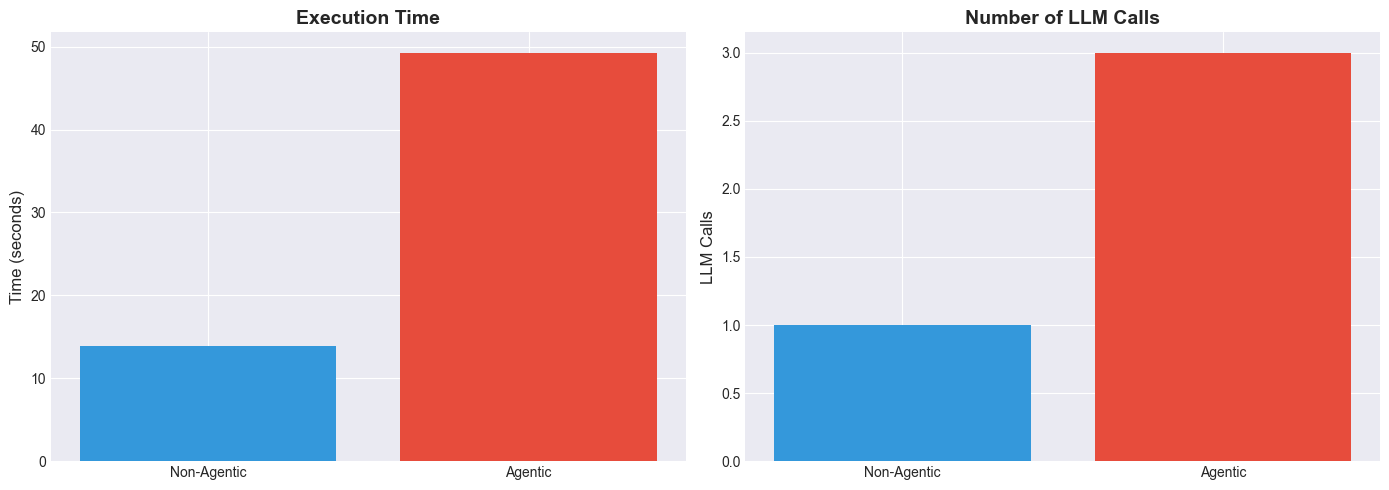

In [11]:
cost_data = paper_result.get('cost', {})

if cost_data:
    print("="*70)
    print("COST ANALYSIS")
    print("="*70)
    
    print(f"\nNon-Agentic:")
    print(f"  Time: {cost_data.get('non_agentic_time', 0):.2f}s")
    print(f"  LLM calls: {cost_data.get('non_agentic_calls', 0)}")
    
    print(f"\nAgentic:")
    print(f"  Time: {cost_data.get('agentic_time', 0):.2f}s")
    print(f"  LLM calls: {cost_data.get('agentic_calls', 0)}")
    
    time_ratio = cost_data.get('agentic_time', 1) / max(cost_data.get('non_agentic_time', 1), 0.1)
    calls_ratio = cost_data.get('agentic_calls', 1) / max(cost_data.get('non_agentic_calls', 1), 1)
    
    print(f"\nCost Multiplier:")
    print(f"  Time: {time_ratio:.1f}x")
    print(f"  LLM calls: {calls_ratio:.1f}x")
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Time
    times = [cost_data.get('non_agentic_time', 0), cost_data.get('agentic_time', 0)]
    ax1.bar(['Non-Agentic', 'Agentic'], times, color=['#3498db', '#e74c3c'])
    ax1.set_ylabel('Time (seconds)', fontsize=12)
    ax1.set_title('Execution Time', fontsize=14, fontweight='bold')
    
    # Calls
    calls = [cost_data.get('non_agentic_calls', 0), cost_data.get('agentic_calls', 0)]
    ax2.bar(['Non-Agentic', 'Agentic'], calls, color=['#3498db', '#e74c3c'])
    ax2.set_ylabel('LLM Calls', fontsize=12)
    ax2.set_title('Number of LLM Calls', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("No cost data available")

## 11. Summary & Recommendation

In [12]:
print("="*70)
print("SUMMARY & RECOMMENDATION")
print("="*70)

quality_winner = 'Non-Agentic' if quality_data['Non-Agentic'] > quality_data['Agentic'] else 'Agentic'
alignment_winner = paper_result['alignment']['winner']

print(f"\nPaper: {paper_id[:60]}")
print(f"\nQuality Winner: {quality_winner}")
print(f"  Non-Agentic: {quality_data['Non-Agentic']:.3f}")
print(f"  Agentic: {quality_data['Agentic']:.3f}")

if alignment_winner != 'n/a':
    print(f"\nAlignment Winner: {alignment_winner.upper()}")
    print(f"  Non-Agentic: {paper_result['alignment']['non_agentic']:.1%}")
    print(f"  Agentic: {paper_result['alignment']['agentic']:.1%}")
else:
    print(f"\nAlignment: Cannot be computed (no ground truth)")

print(f"\nCost Difference:")
print(f"  Agentic is {time_ratio:.1f}x slower and uses {calls_ratio:.1f}x more LLM calls")

print(f"\n{'─'*70}")
if alignment_winner == 'agentic':
    print("RECOMMENDATION: Agentic approach is better for this paper")
    print("  ✓ Better alignment with ground truth")
    print("  Note: Higher cost may be justified")
elif alignment_winner == 'non_agentic':
    print("RECOMMENDATION: Non-agentic approach is better for this paper")
    print("  ✓ Better or equal alignment with ground truth")
    print("  ✓ Much lower cost")
elif quality_winner == 'Non-Agentic':
    print("RECOMMENDATION: Non-agentic approach is better for this paper")
    print("  ✓ Better quality (no ground truth available)")
    print("  ✓ Much lower cost")
else:
    print("RECOMMENDATION: Agentic approach may be better for this paper")
    print("  ✓ Better quality (no ground truth available)")
    print("  Note: Higher cost")
print(f"{'─'*70}")

SUMMARY & RECOMMENDATION

Paper: Understanding Scaling Laws with Statistical and Ap_e411a237

Quality Winner: Agentic
  Non-Agentic: 0.975
  Agentic: 0.975

Alignment Winner: TIE
  Non-Agentic: 0.0%
  Agentic: 0.0%

Cost Difference:
  Agentic is 3.5x slower and uses 3.0x more LLM calls

──────────────────────────────────────────────────────────────────────
RECOMMENDATION: Agentic approach may be better for this paper
  ✓ Better quality (no ground truth available)
  Note: Higher cost
──────────────────────────────────────────────────────────────────────


## 12. Multi-Paper Comparison

Compare results across all papers in the run:

MULTI-PAPER COMPARISON



,paper,non_agentic_quality,agentic_quality,non_agentic_alignment,agentic_alignment,winner
0,Understanding Scaling Laws wit,0.975,0.975,0.0,0.0,tie
1,Scaling transformer neural net,0.955,0.975,0.0,0.0,tie



Winner Distribution:
winner
tie    2
Name: count, dtype: int64

Average Quality Scores:
  Non-Agentic: 0.965
  Agentic: 0.975

Average Alignment Scores:
  Non-Agentic: 0.0%
  Agentic: 0.0%


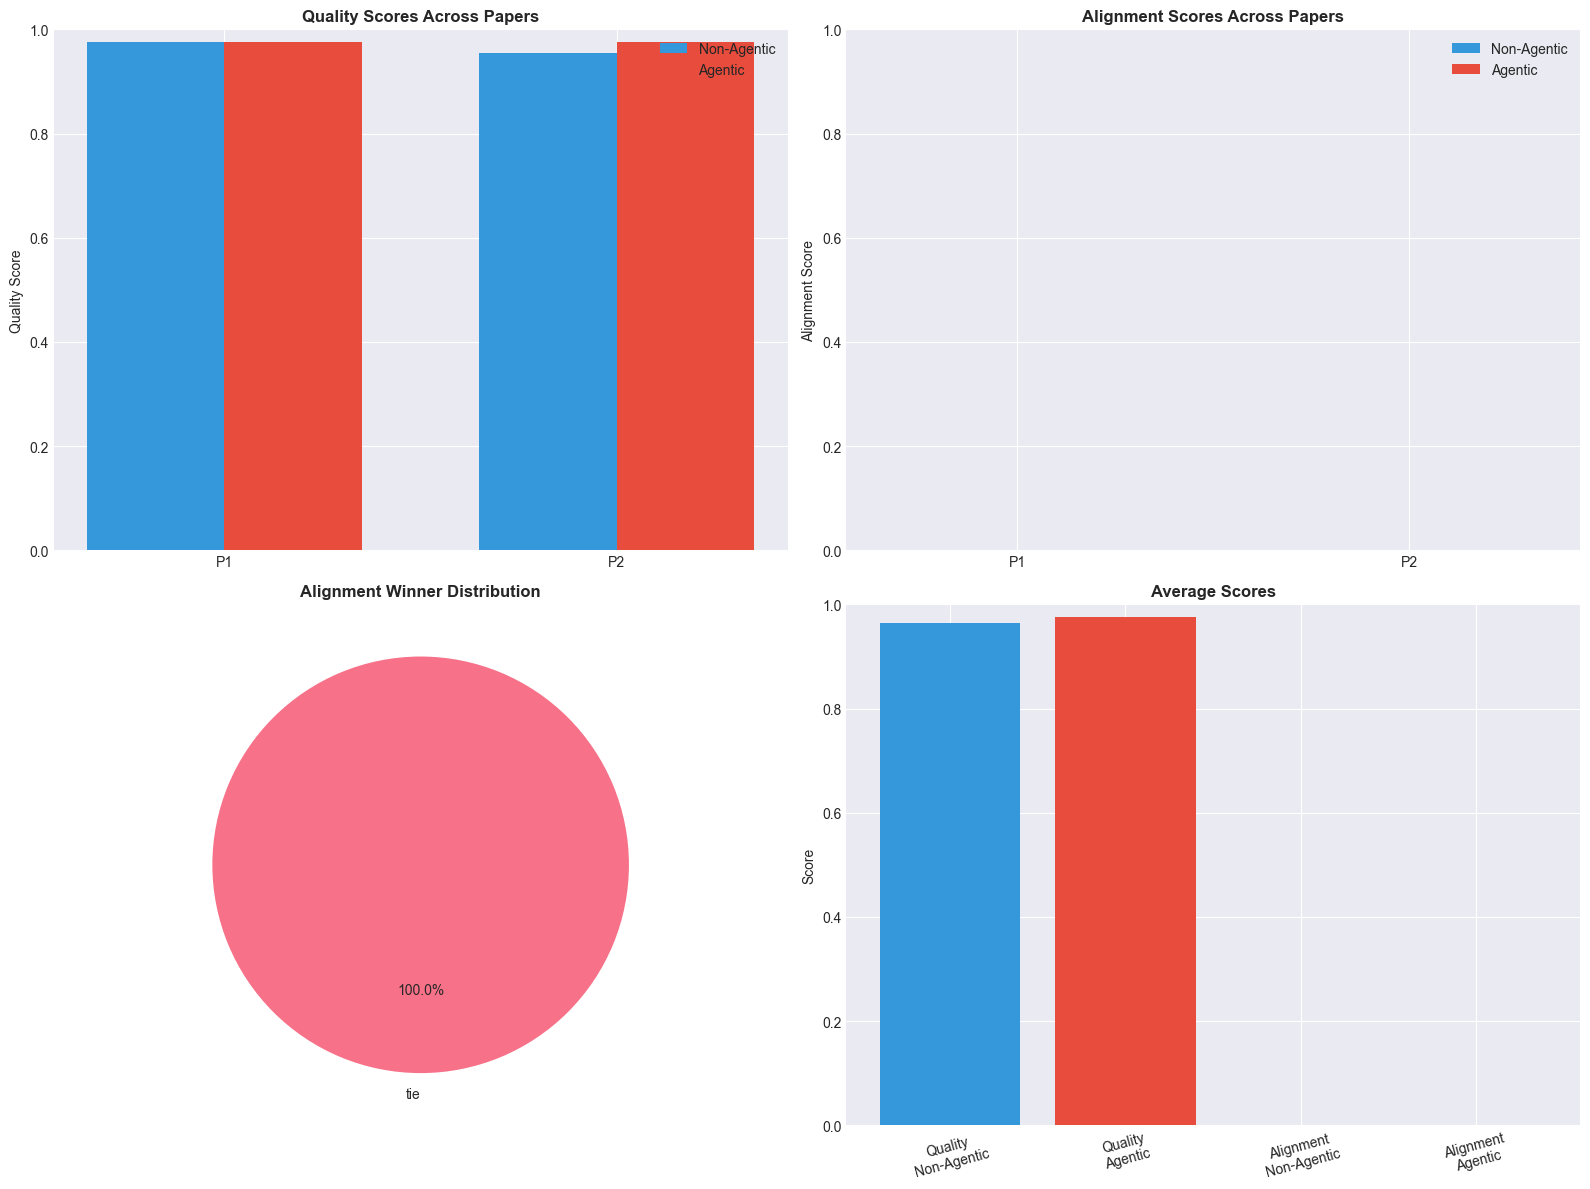

In [13]:
if len(summary['results']) > 1:
    # Collect data
    papers_data = []
    for result in summary['results']:
        if 'error' not in result:
            papers_data.append({
                'paper': result['paper_id'][:30],
                'non_agentic_quality': result['quality']['non_agentic'],
                'agentic_quality': result['quality']['agentic'],
                'non_agentic_alignment': result['alignment']['non_agentic'],
                'agentic_alignment': result['alignment']['agentic'],
                'winner': result['alignment']['winner']
            })
    
    df = pd.DataFrame(papers_data)
    
    print("="*70)
    print("MULTI-PAPER COMPARISON")
    print("="*70)
    print()
    display(df)
    
    # Summary stats
    print(f"\nWinner Distribution:")
    print(df['winner'].value_counts())
    
    print(f"\nAverage Quality Scores:")
    print(f"  Non-Agentic: {df['non_agentic_quality'].mean():.3f}")
    print(f"  Agentic: {df['agentic_quality'].mean():.3f}")
    
    print(f"\nAverage Alignment Scores:")
    print(f"  Non-Agentic: {df['non_agentic_alignment'].mean():.1%}")
    print(f"  Agentic: {df['agentic_alignment'].mean():.1%}")
    
    # Plot comparison
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Quality comparison
    x_pos = range(len(df))
    width = 0.35
    
    axes[0, 0].bar([i - width/2 for i in x_pos], df['non_agentic_quality'], width, label='Non-Agentic', color='#3498db')
    axes[0, 0].bar([i + width/2 for i in x_pos], df['agentic_quality'], width, label='Agentic', color='#e74c3c')
    axes[0, 0].set_ylabel('Quality Score')
    axes[0, 0].set_title('Quality Scores Across Papers', fontweight='bold')
    axes[0, 0].set_xticks(x_pos)
    axes[0, 0].set_xticklabels([f"P{i+1}" for i in x_pos])
    axes[0, 0].legend()
    axes[0, 0].set_ylim(0, 1.0)
    
    # Alignment comparison
    axes[0, 1].bar([i - width/2 for i in x_pos], df['non_agentic_alignment'], width, label='Non-Agentic', color='#3498db')
    axes[0, 1].bar([i + width/2 for i in x_pos], df['agentic_alignment'], width, label='Agentic', color='#e74c3c')
    axes[0, 1].set_ylabel('Alignment Score')
    axes[0, 1].set_title('Alignment Scores Across Papers', fontweight='bold')
    axes[0, 1].set_xticks(x_pos)
    axes[0, 1].set_xticklabels([f"P{i+1}" for i in x_pos])
    axes[0, 1].legend()
    axes[0, 1].set_ylim(0, 1.0)
    
    # Winner pie chart
    winner_counts = df['winner'].value_counts()
    axes[1, 0].pie(winner_counts.values, labels=winner_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1, 0].set_title('Alignment Winner Distribution', fontweight='bold')
    
    # Average comparison
    avg_data = {
        'Quality\nNon-Agentic': df['non_agentic_quality'].mean(),
        'Quality\nAgentic': df['agentic_quality'].mean(),
        'Alignment\nNon-Agentic': df['non_agentic_alignment'].mean(),
        'Alignment\nAgentic': df['agentic_alignment'].mean()
    }
    colors = ['#3498db', '#e74c3c', '#3498db', '#e74c3c']
    axes[1, 1].bar(avg_data.keys(), avg_data.values(), color=colors)
    axes[1, 1].set_ylabel('Score')
    axes[1, 1].set_title('Average Scores', fontweight='bold')
    axes[1, 1].set_ylim(0, 1.0)
    axes[1, 1].tick_params(axis='x', rotation=15)
    
    plt.tight_layout()
    plt.show()
else:
    print("Only one paper in this run. Run on more papers for multi-paper comparison.")